In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the shapefile
us_map = gpd.read_file('~/Chloropleths/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

# Check the first few rows to understand the structure
#print(us_map.head())

In [18]:
# Hardcoded example
#data = {
#    'State': ['CA', 'TX', 'NY', 'FL', 'IL', 'OK', 'NM', 'AZ', 'NV'],
#    'Average_Income': [65000, 59000, 70000, 62000, 63000, 59000, 48000, 67000, 72000]
#}
#income_df = pd.DataFrame(data)

In [74]:
# Reading data from file
income_df = pd.read_csv('~/Chloropleths/states_48_income.csv', header=0)

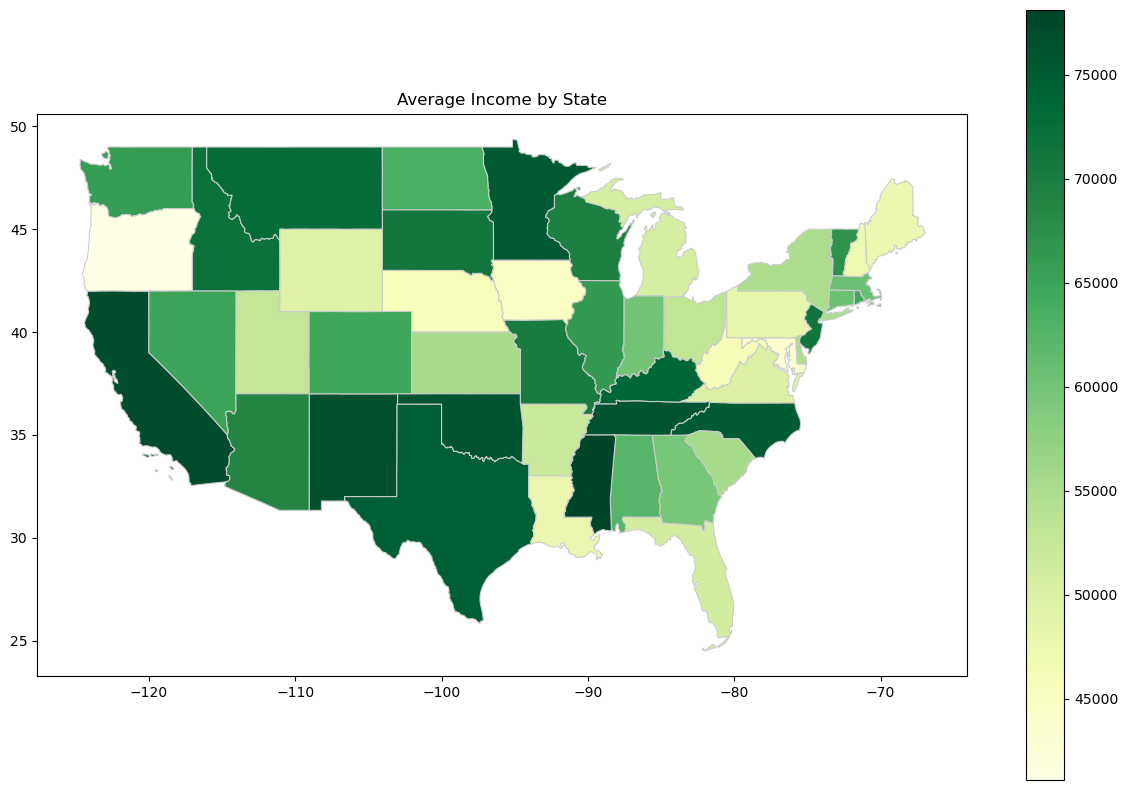

In [75]:
# Merge the shapefile DataFrame with your data
merged = us_map.set_index('STUSPS').join(income_df.set_index('abbreviation'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='income', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Average Income by State')
plt.show()


In [63]:
# Reading data from file
income_df = pd.read_csv('~/Chloropleths/states_50_income.csv', header=0)

In [64]:
income_df_ak = income_df.loc[income_df['abbreviation'] == 'AK']
income_df_hi = income_df.loc[income_df['abbreviation'] == 'HI']
income_df_48 = income_df.loc[~income_df['abbreviation'].isin(['AK', 'HI'])]

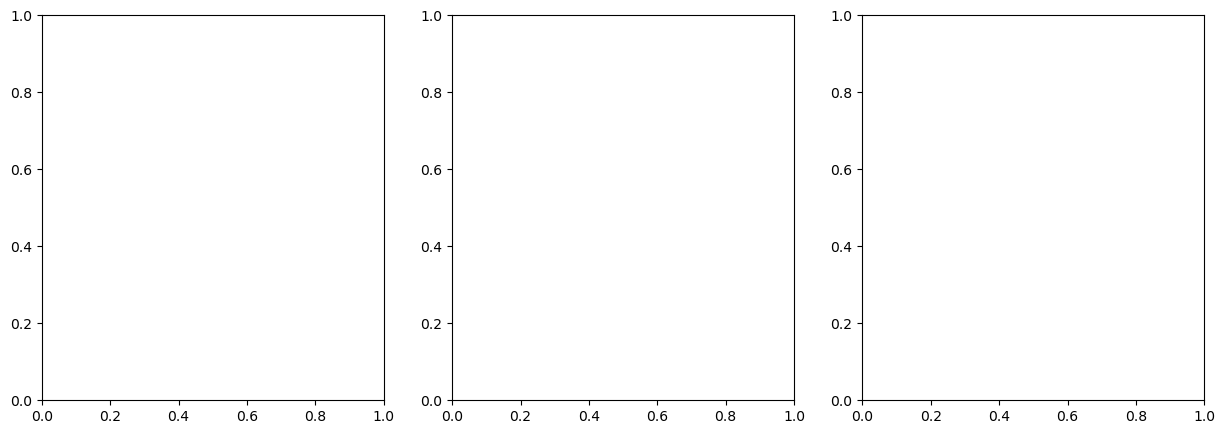

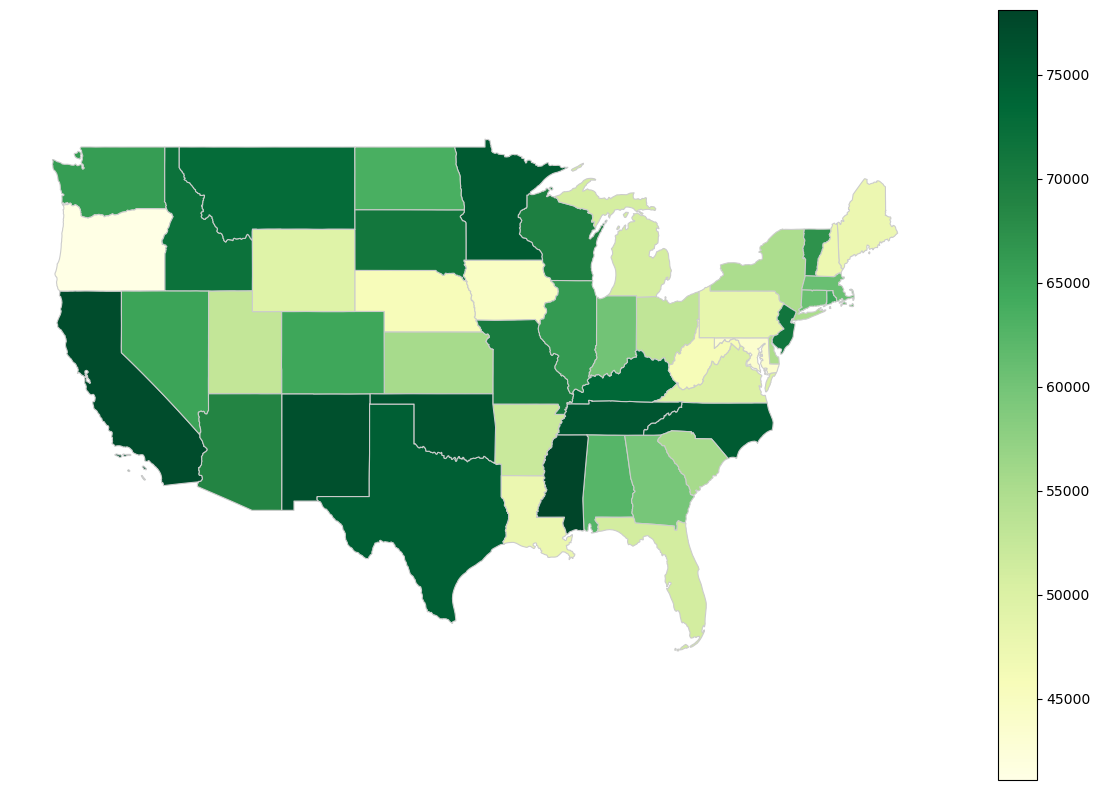

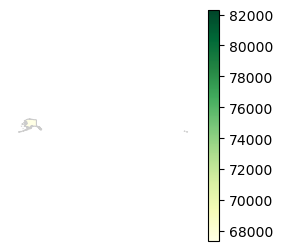

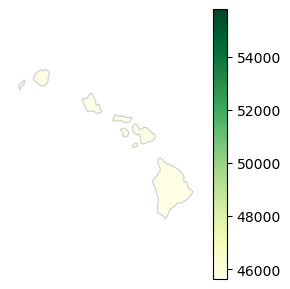

In [65]:
# Merge the shapefile DataFrame with your data

fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

merged = us_map.set_index('STUSPS').join(income_df_48.set_index('abbreviation'))
fig, axarr[0] = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='income', cmap='YlGn', linewidth=0.8, ax=axarr[0], edgecolor='0.8', legend=True)

merged = us_map.set_index('STUSPS').join(income_df_ak.set_index('abbreviation'))
fig, axarr[1] = plt.subplots(1, 1, figsize=(3, 3))
merged.plot(column='income', cmap='YlGn', linewidth=0.8, ax=axarr[1], edgecolor='0.8', legend=True)

merged = us_map.set_index('STUSPS').join(income_df_hi.set_index('abbreviation'))
fig, axarr[2] = plt.subplots(1, 1, figsize=(3, 3))
merged.plot(column='income', cmap='YlGn', linewidth=0.8, ax=axarr[2], edgecolor='0.8', legend=True)

for ax in axarr:
    ax.axis('off')

plt.tight_layout()
plt.show()

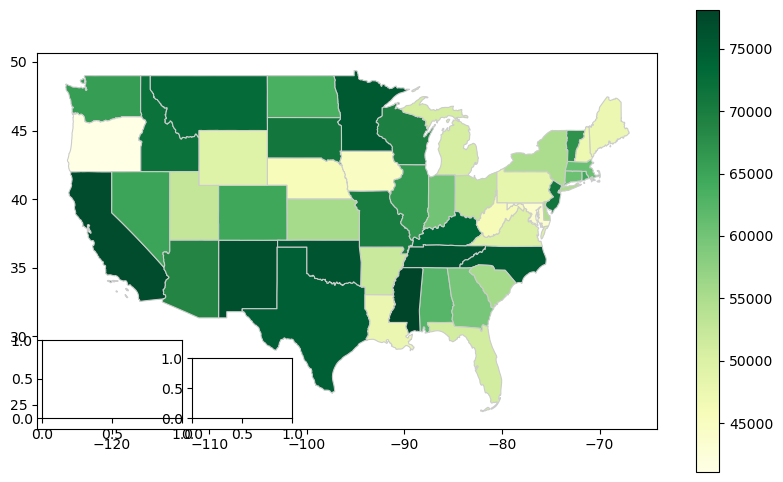

In [115]:
fig, ax_main = plt.subplots(figsize=(10, 6))

contiguous = us_map.set_index('STUSPS').join(income_df_48.set_index('abbreviation'))
contiguous.plot(column='income', cmap='YlGn', linewidth=0.8, ax=ax_main, edgecolor='0.8', legend=True)

akax = fig.add_axes([0.13, 0.2, 0.14, 0.13])   
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1]) 

#for ax in [akax, hiax]:
#    ax.axis('off')

#alaksa = us_map.set_index('STUSPS').join(income_df_ak.set_index('abbreviation'))
#alaska.plot(column='income', cmap='YlGn', linewidth=0.8, ax=akax, edgecolor='0.8', legend=True)

# Adjust plot limits to focus on the contiguous states
#ax_main.set_xlim(-125, -65)  # Adjust the x-axis limits
#ax_main.set_ylim(24, 50)     # Adjust the y-axis limits




#ax_inset = fig.add_axes([0.2, 0.2, 0.25, 0.25])  # [left, bottom, width, height]
#alaksa = us_map.set_index('STUSPS').join(income_df_ak.set_index('abbreviation'))
#alaska.plot(column='income', cmap='YlGn', linewidth=0.8, ax=ax_inset, edgecolor='0.8', legend=True)




# Create insets for Alaska and Hawaii
#ax_alaska = fig.add_axes([0.05, 0.55, 0.2, 0.35])  # [left, bottom, width, height]
#ax_hawaii = fig.add_axes([0.65, 0.55, 0.2, 0.25])

#alaksa = us_map.set_index('STUSPS').join(income_df_ak.set_index('abbreviation'))
#alaska.plot(column='income', cmap='YlGn', linewidth=0.8, ax=ax_alaska, edgecolor='0.8', legend=True)

#hawaii = us_map.set_index('STUSPS').join(income_df_hi.set_index('abbreviation'))
#hawaii.plot(column='income', cmap='YlGn', linewidth=0.8, ax=ax_hawaii, edgecolor='0.8', legend=True)

# Remove axis for all insets
#for ax in [ax_alaska, ax_hawaii]:
#    ax.axis('off')

plt.show()